<a href="https://colab.research.google.com/github/sonika-07/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Sonika Baheti

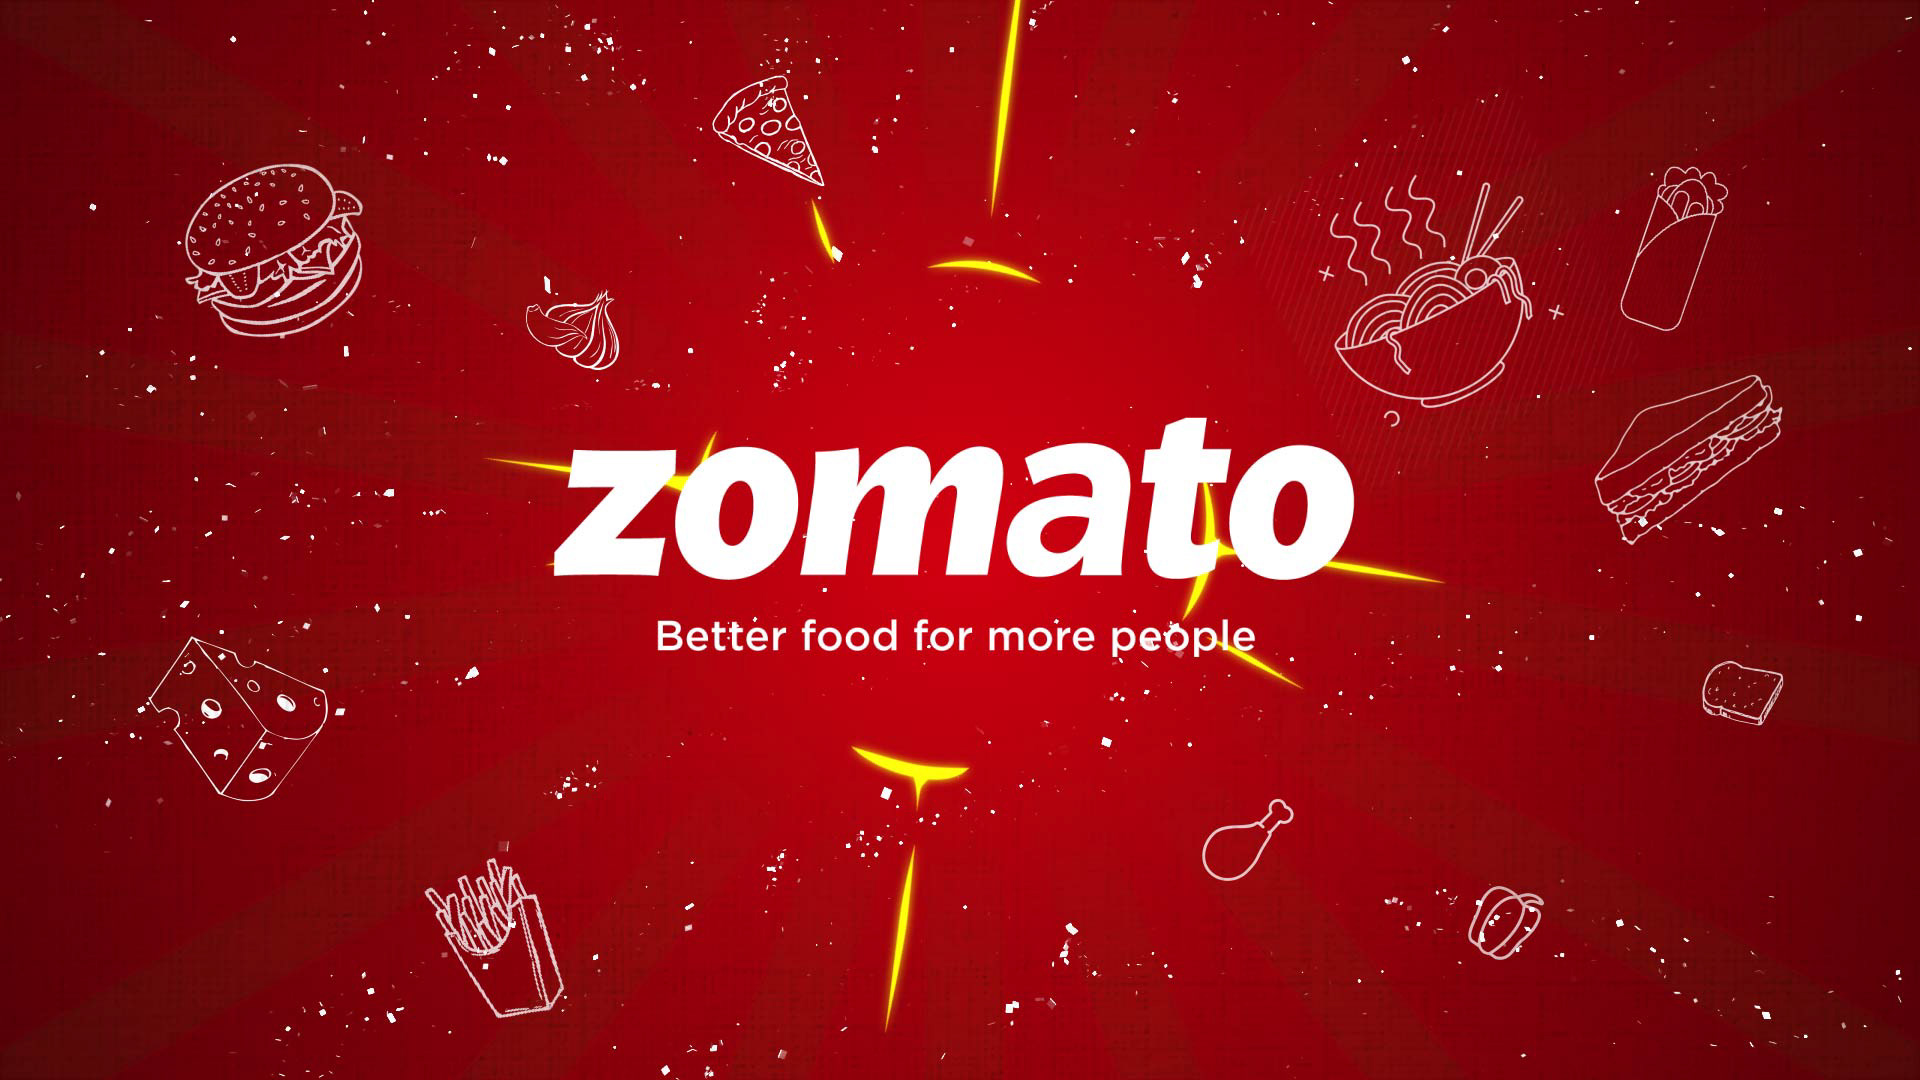

# **Project Summary -**

Write the summary here within 500-600 words.

# **Data Description**

##Zomato Restaurant names and Metadata

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

##Zomato Restaurant reviews

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Loading Zomato Restaurant names and Metadata Dataset 
hotel=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
review=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# hotel First Look
hotel.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# review First Look
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
hotel.shape

(105, 6)

In [ ]:
# Dataset Rows & Columns count
review.shape

(10000, 7)

Hotel contains 105 records and 6 features while review dataset contains 10000 records and 7 features.

### Dataset Information

In [ ]:
# metadata Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Cost must be int type but it contains comma(,) , hence its datatype is object here.
Also Timings represent the time from when the restaurant opens till end time when restaurants shut down, ut it is given in the form of text, hence object datatype.

In [ ]:
# review Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Here all the columns in both the dataset is 'object' type except 'pictures' (Since it contains Number of pictures posted by customers).

#### Duplicate Values

In [ ]:
#hotel Dataset Duplicate Value Count
print(len(hotel[hotel.duplicated()]))

0


There are no duplicate values in metadata df.

In [ ]:
#review Dataset Duplicate Value Count
print(len(review[review.duplicated()]))

36


There are some duplicate values in review dataset. Let's find out more about this.

In [ ]:
#Check what are dplicated values present in the dataset
review[review.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

Since all the duplicated rows are null values. Hence we can drop them.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count in hotel
hotel.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

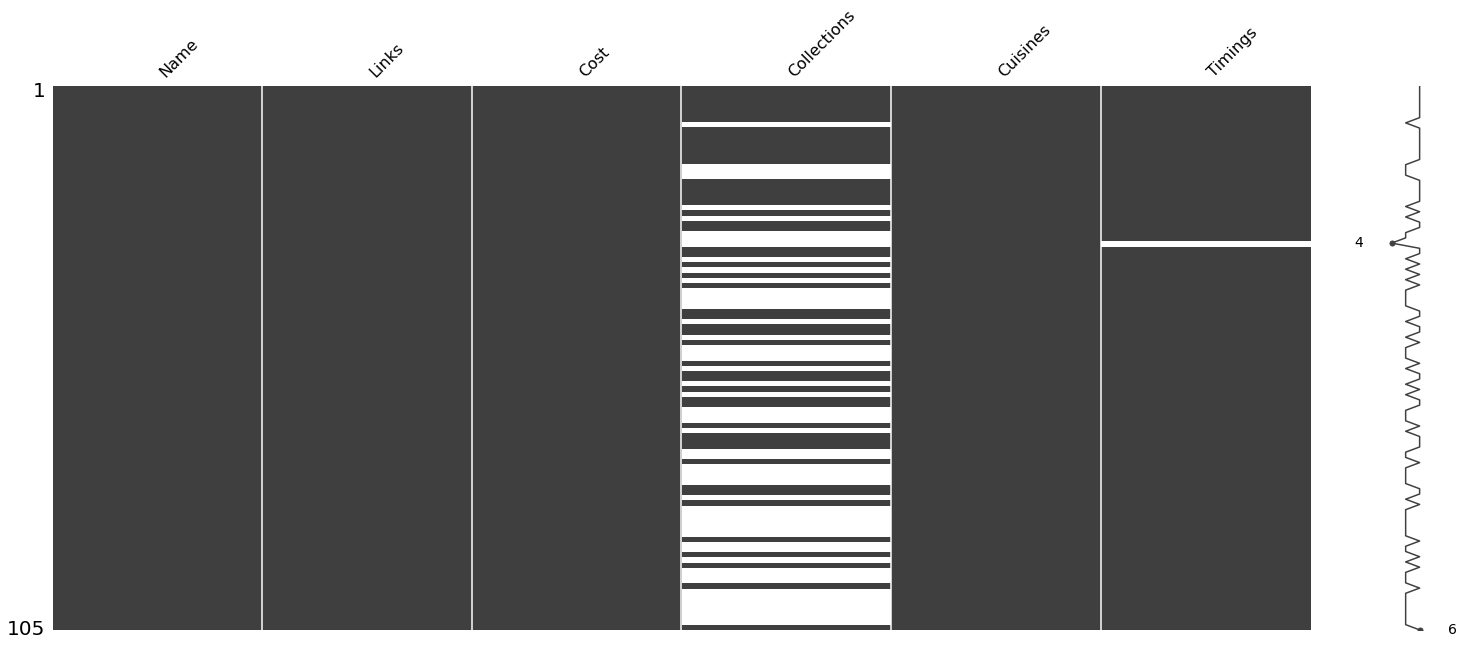

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(hotel)

In [ ]:
hotel[hotel['Timings'].isnull()]

Name                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

There are some missing values in the column collections a, i.e., 54 and one in Timings column( this include one of the 54 records missing in collections).

In [ ]:
# Missing Values/Null Values Count in review
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

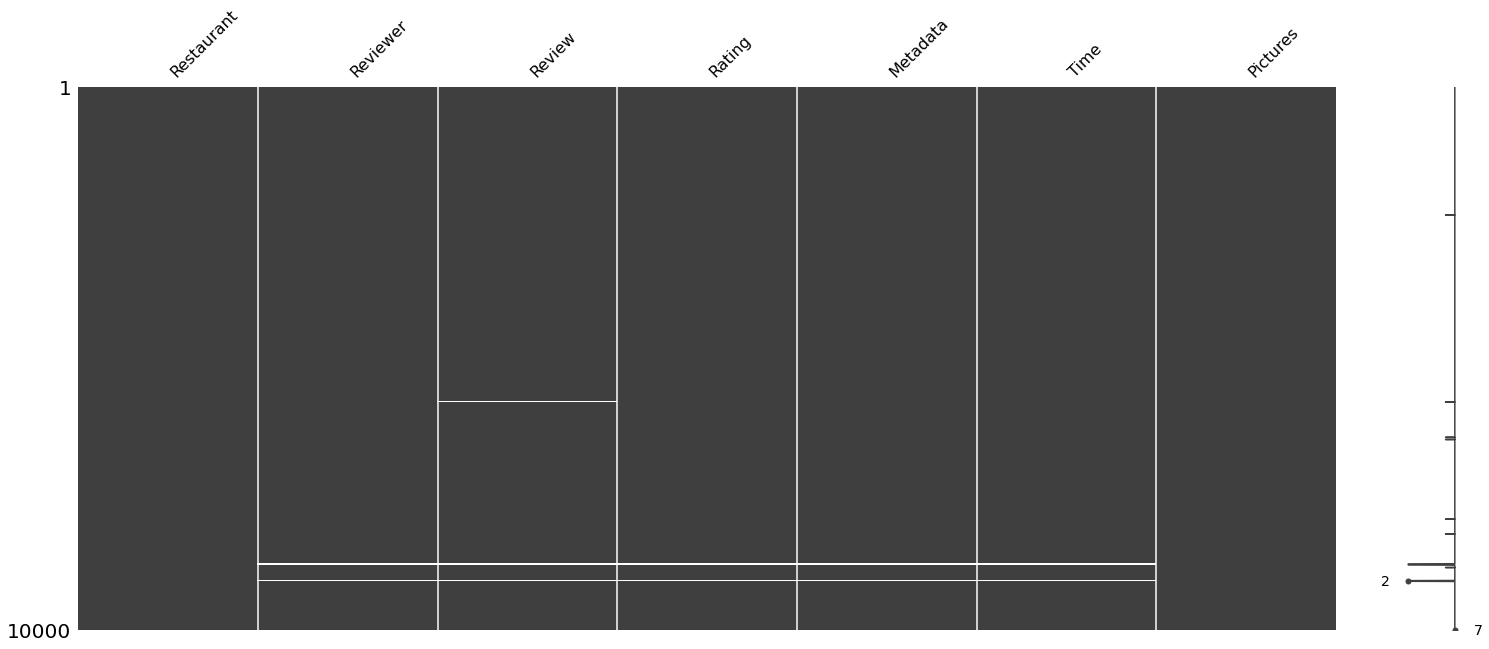

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(review)

In reviews dataset, most of the columns have missing values.

### What did you know about your dataset?

There are two datasets given:

1. Restaurant Names and metadata:
   * There are 105 records and 6 features in metadata.
   * There are missing or null values in Colllections and timings.
   * There are no duplicated values.
   * Cost must be int type but it contains comma(,) , hence its datatype is object here.
   * Timings represent the time from when the restaurant opens till end time when restaurants shut down, but it is given in the form of text, hence object datatype.

2. Reviews dataset:
   * There are 10000 records(or reviews) given with 7 features.
   * Except Name of Restaurants and Number of picture posted, There are null values.
   * There are some of the duplicated values for restaurnts which can be dropped(Since it contains null values for all the columns).
   * Rating must be integer but it contais value 'like', hence it is object datatype.


## ***2. Understanding Your Variables***

In [ ]:
# hotel dataset Columns
hotel.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# review Dataset Columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
hotel.describe(include='all').T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

Here none of the columns are seemed to be categorical.

In [ ]:
#describe review dataset
review.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

* From description of review dataset, we can infer that there are 100 Restaurants for which customers have given their review.
* Some of the customers have provided review to more than one restaurant.
* Rating can be considered as categorical variable.

### Variables Description 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable in hotel.
for col in hotel.columns:
  print("Column:",col,"\n",hotel[col].nunique())
  print('--'*70)

Column: Name 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Links 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cost 
 29
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Collections 
 42
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cuisines 
 92
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Timings 
 77
--------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Check Unique Values for each variable in review.
for col in review.columns:
  print("Column:",col,"\n",review[col].nunique())
  print('--'*70)

Column: Restaurant 
 100
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Reviewer 
 7446
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Review 
 9364
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Rating 
 10
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Metadata 
 2477
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Time 
 9782
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Pictures 
 

In [ ]:
# Check Unique Values for rating variable.

'''
We can check for unique value of Ratings given by customers
'''

print("Column:",'Rating',"\n",review['Rating'].unique())  

Column: Rating 
 [5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5]


The ratings are given by customer as 1,1.5,2,2.5,...5  and 'like' while there are some missing values. 
* We can replace the missing value with median of that particular restaurant.
* Also We know that 'like' is not a rating and replacing it with rating 4 (Because rating 4 can be considered as people like the taste)

## 3. ***Data Wrangling***

### Data Wrangling Code

###1. Review dataset

In [ ]:
# Dropping the duplicate values in reviews df
review.drop_duplicates(keep=False,inplace=True)

In [ ]:
# Replace Rating 'Like' with rating 4
review['Rating']=review['Rating'].str.replace("Like",'4').astype('float')

Now there are null values just in 'Review' column.

---
We can drop records which have null values in Review column.



In [ ]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers']=review['Metadata'].str.split(',').str
review['No_of_reviews']=pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers']=pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  No_of_reviews  \
0           1 Review , 2 Followers  5/25/2019 15:54         0              1   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0              3   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0              2   
3            1 Review , 1 Follower  5/24/2019 22:11         0              1   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0              3   
...                            ...              ...       ...            ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0             53   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0              2   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3             65   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0             13   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6            472   

      Followers  
0           2.0  
1           2.0  
2           3.0  
3           1.0  
4           2.0  
...         ...  
9995       54.0  
9996       53.0  
9997      423.0  
9998      144.0  
9999     1302.0  

[9962 rows x 9 columns]

In [ ]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [ ]:
# Converting Time to date time and extracting Hour and year 
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour  

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9962 non-null   object        
 1   Reviewer       9962 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9962 non-null   float64       
 4   Metadata       9962 non-null   object        
 5   Time           9962 non-null   datetime64[ns]
 6   Pictures       9962 non-null   int64         
 7   No_of_reviews  9962 non-null   int64         
 8   Followers      9962 non-null   float64       
 9   Year           9962 non-null   int64         
 10  Hour           9962 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 933.9+ KB


###2. Hotel dataset

In [ ]:
# Renaming the hotel dataset column name
hotel.rename(columns={'Name':'Restaurant'},inplace=True)

In [ ]:
# checking values for cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Removing ',' from Cost in hotel
hotel['Cost']=hotel['Cost'].str.replace(",","").astype("int64")

In [ ]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

In [ ]:
# Let's merge the two dataset
df = hotel.merge(review, on = 'Restaurant')
df.shape

(9962, 17)

### What all manipulations have you done and insights you found?

For the Review dataset:
* Dropped the duplicate rows (since it contained null values)
* Changed the Rating - Like to numeric value and changed it datatype ( Since it represents the ordinal data)
* Extracted No_of_review and followers from Metadata column and filled the null values of followes with 0.
* Cahnged the time datatype to datetime and extracted Year and Hour from it.

For the Hotel dataset:
* Rename the Column 'Name' to 'Restaurant' for the sake of simplicity.
* Removed special character(,) from Cost and changed its datatype to integer.
* Get the number of cuisines.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Cost'>

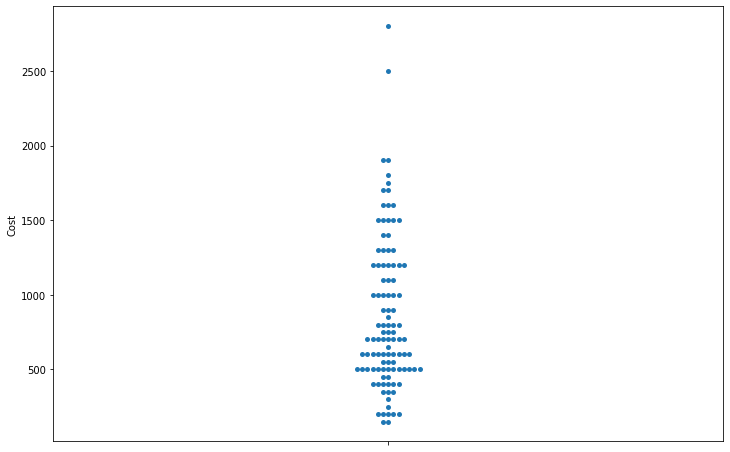

In [ ]:
# Let's now plot the swarmplot to see the variation in price 
sns.swarmplot(hotel['Cost'])

##### 1. Why did you pick the specific chart?

To find the cost of restaurants.

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible that Price of dishes in restaurants varies from below 500 to more than 2500. But there are too few restaurants whose price is more than 2000. Let's find out more about Restaurant prices.

#### Chart - 2

In [ ]:
#Find out the costliest restaurants
costly_res=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

In [ ]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Restaurant   Cost
0       Mohammedia Shawarma  150.0
1                      Amul  150.0
2              Sweet Basket  200.0
3                 KS Bakers  200.0
4             Momos Delight  200.0
5        Hunger Maggi Point  200.0
6            Asian Meal Box  200.0
7               Wich Please  250.0
8  Shah Ghouse Spl Shawarma  300.0
9                  Tempteys  350.0

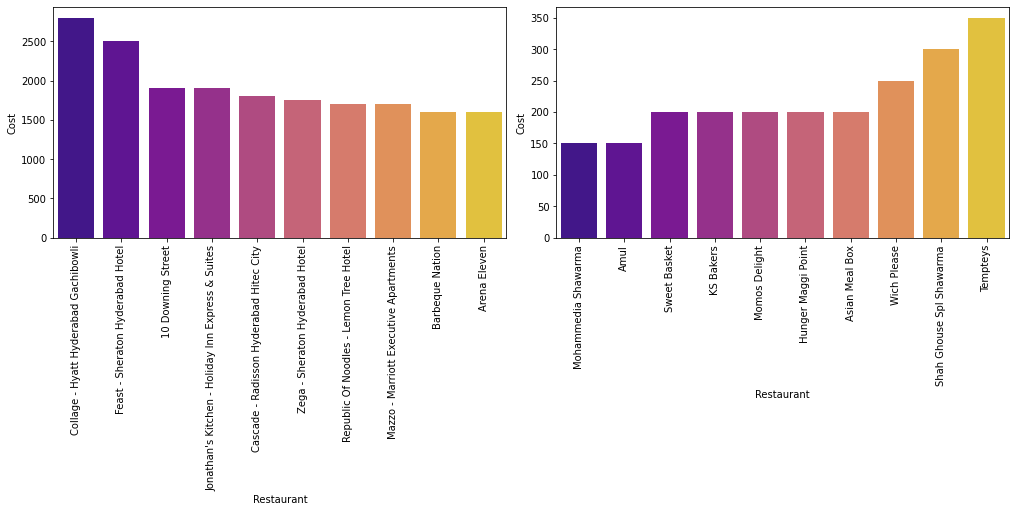

In [ ]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Restaurant',y = 'Cost',data = costly_res,ax = axes[0],palette = 'plasma')
a.set_xticklabels(labels=costly_res['Restaurant'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Restaurant',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'plasma')
b.set_xticklabels(labels=cheapest_res['Restaurant'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize which are the expensive restaurants and which are the cheap restaurants on Zomato.

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant whose price is rupees 2800 which is followed by "Feast - Sheraton Hyderabad Hotel" whose price is rupees 2500. Other expensive restaurants can be seen from the graph and table.

Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of rupees 150 , which is followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is rupees 200 . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight we get to know about the restaurants which has dishes containing lower prices. So a middle waged person can afford it easily. Hence this can be benefitial for that particular restaurant as well as Zomato as more people will order food from Zomato.

Also we get to know about the most expensive restaurant, which led to negative growth of that restaurants as fear of losing money if they do not get the taste they want by customers. 

#### Chart - 3

(-0.5, 1999.5, 1999.5, -0.5)

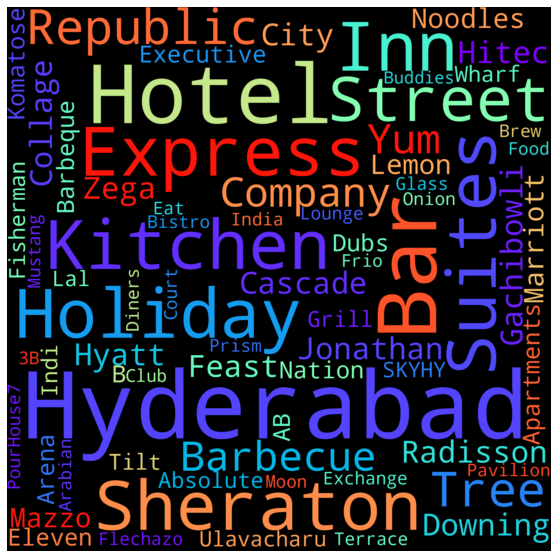

In [ ]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

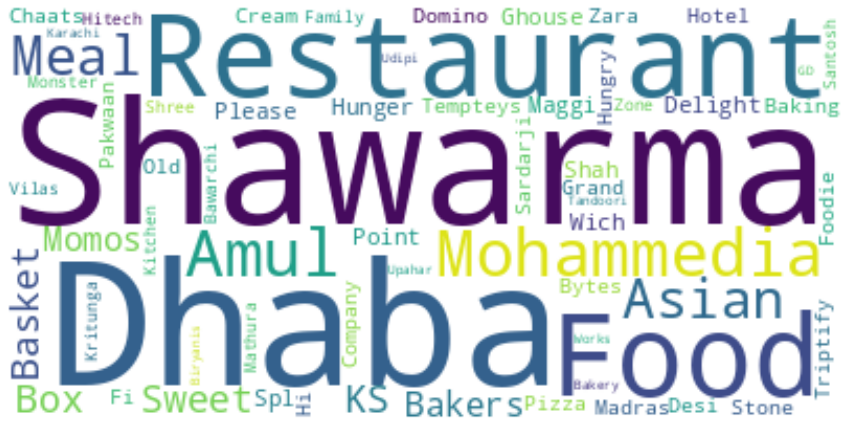

In [ ]:
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, HYDERABAD, HOTEL, BAR etc seems frequently repeating for expensive restaurant, while for cheap restaurants SHAWARMA, DHABA, RESTAURANTS seems frequently repeating. So it can be infer that Hotel and Bars of Hyderabad are expensive while Dhabas and Restaurants are cheaper.

#### Chart - 4

In [ ]:
#See the average rating and total number of review given to the restaurants

avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                       10 Downing Street    3.80           100
1                                13 Dhaba    3.48           100
2          3B's - Buddies, Bar & Barbecue    4.76           100
3               AB's - Absolute Barbecues    4.88           100
4                       Absolute Sizzlers    3.62           100
..                                    ...     ...           ...
95             Urban Asia - Kitchen & Bar    3.65           100
96  Yum Yum Tree - The Arabian Food Court    3.56           100
97        Zega - Sheraton Hyderabad Hotel    4.45           100
98               Zing's Northeast Kitchen    3.65           100
99                                eat.fit    3.20           100

[100 rows x 3 columns]

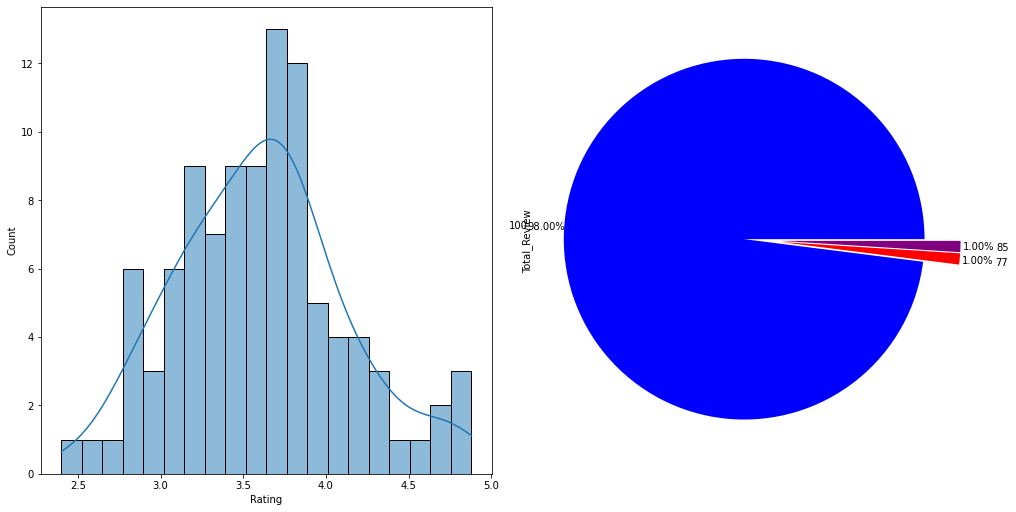

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Let's see te histogram of average rating
a=sns.histplot(data=avg_hotel_rating['Rating'],bins=20,kde=True,ax=axes[0])

# plot the pie chart of number of reveivers for restaurants
b=avg_hotel_rating['Total_Review'].value_counts().plot(kind='pie', shadow=False, autopct='%1.2f%%',
                                                       explode = (0.1, 0.1, 0.1),pctdistance=1.1,labeldistance=1.2,
                                                       colors=['Blue','red','purple'],ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of average rating , I used histplot and to see review distribution, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?

average Ratings are are normally distributed for the restaurants.

100 reviews are given to all the restaurants except 2 restaurants whose reviews are 85 and 77 respectively.

#### Chart - 5

In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

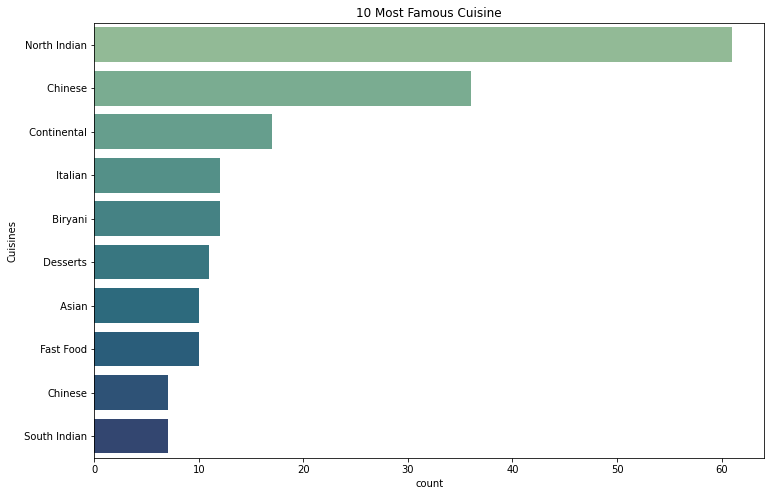

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='crest')
plt.title('10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Since categorical features are best visualized through bar chart. Hence bar graph is used. 

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible that North Indian is the most served cuisine in restaurants which is followed by Chinese and Continental.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may be helpful for new enterpreneurs who wants to open new restaurants in their area so that they get know what people like mostly and keep that cuisine in their menu.

#### Chart - 6

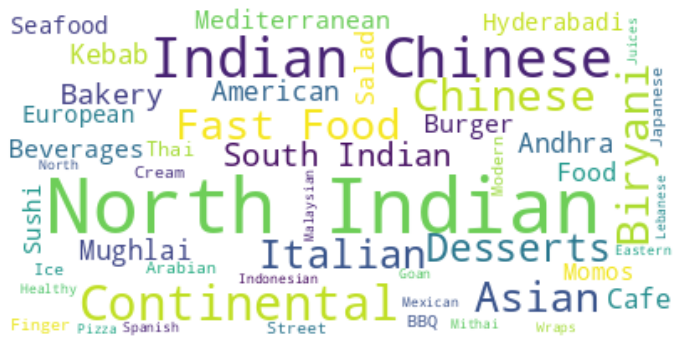

In [ ]:
#CREATING WORDCLOUD FOR CUISINES

plt.figure(figsize=(12,10))
df_word_cloud = cuisine_df['Cuisines']
text = " ".join(word for word in df_word_cloud)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, North Indian is the most frequently used which is followed by chinese and continental.

#### Chart - 7

(-0.5, 1399.5, 1399.5, -0.5)

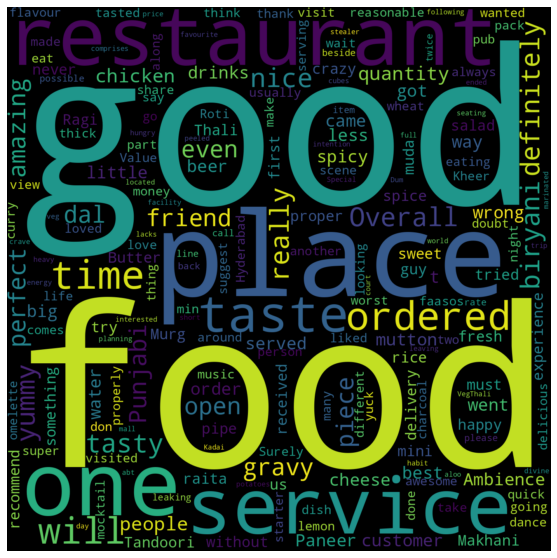

In [ ]:
# Creating word cloud for reviews
plt.figure(figsize=(15,10))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

To see what word is frequently used by the reviewers.

##### 2. What is/are the insight(s) found from the chart?

Most of the time customers liked the food because good is repeating most in reviews. Also food is next most repeating word. 

#### Chart - 8

In [ ]:
# Check out for top collections
top_collections = hotel['Collections'].value_counts().reset_index()
top_collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)
top_collections

Collection  Count
0         Food Hygiene Rated Restaurants in Hyderabad      4
1                                       Great Buffets      2
2                                 Hyderabad's Hottest      2
3                                         New on Gold      2
4                                Pan-Asian Delicacies      2
5                                     Veggie Friendly      2
6                                  Trending This Week      2
7   Sunday Brunches, Great Breakfasts, Function Ve...      1
8                 Function Venues, Regional Favorites      1
9                    Veggie Friendly, Terrific Thalis      1
10              Great Buffets, Live Sports Screenings      1
11                               Sneak Peek Hyderabad      1
12  Food Hygiene Rated Restaurants in Hyderabad, C...      1
13                                    Best Milkshakes      1
14  Great Breakfasts, Late Night Restaurants, Best...      1
15  Happy Hours, Top Drinking Destinations, Corpor...      1
16  Sneak Peek Hyderabad, Best Bars & Pubs, Gigs a...      1
17               Happy Hours, Top-Rated, Gold Curated      1
18               Gigs and Events, Corporate Favorites      1
19  Food Hygiene Rated Restaurants in Hyderabad, G...      1
20                                      Best Bakeries      1
21                                 Brilliant Biryanis      1
22                  Great Buffets, Trending This Week      1
23    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
24                                      Fancy and Fun      1
25             Top-Rated, Gold Curated, Fancy and Fun      1
26                 Great Buffets, Hyderabad's Hottest      1
27                             Late Night Restaurants      1
28  Best Bars & Pubs, Food Hygiene Rated Restauran...      1
29  Sunday Brunches, Corporate Favorites, Great Bu...      1
30  Great Buffets, Live Sports Screenings, Best Ba...      1
31                                    Frozen Delights      1
32      Street Food, Veggie Friendly, Pocket Friendly      1
33                                   Barbecue & Grill      1
34  Corporate Favorites, Happy Hours, Live Sports ...      1
35  Barbecue & Grill, Great Buffets, Corporate Fav...      1
36                     Great Italian, Sunday Brunches      1
37            Live Sports Screenings, Gigs and Events      1
38  Rooftops, Live Sports Screenings, Best Bars & ...      1
39           Barbecue & Grill, Live Sports Screenings      1
40                                             Haleem      1
41                                    Sunday Brunches      1

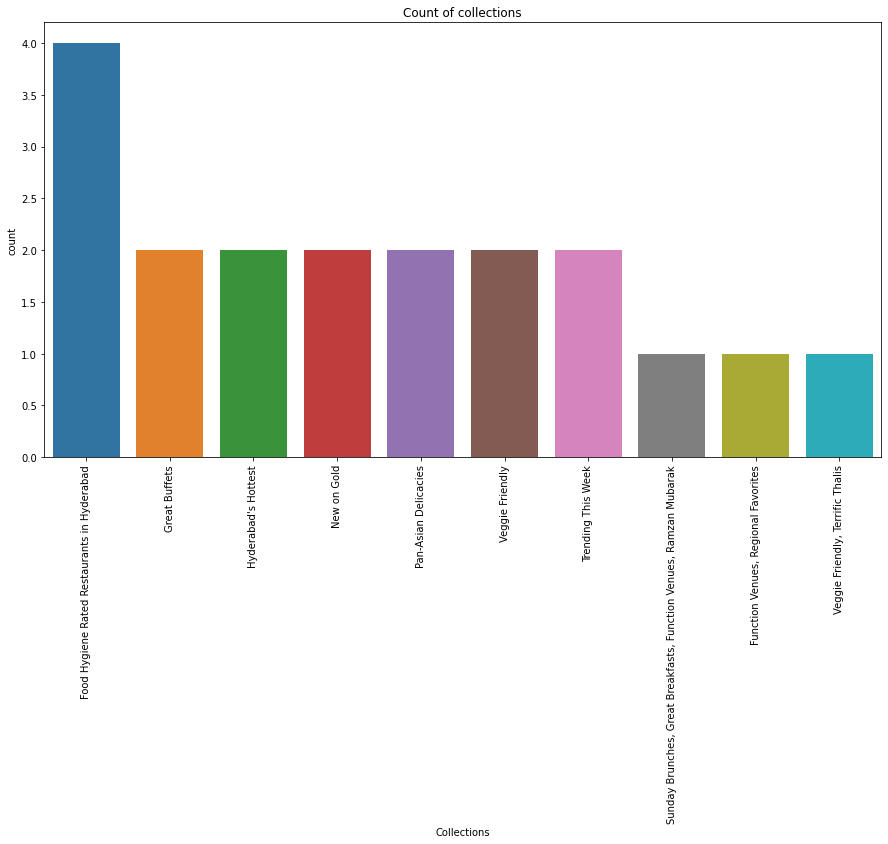

In [ ]:
#plot for collection count
plt.figure(figsize = (15,8))
sns.countplot(x='Collections',data=hotel,order=hotel.Collections.value_counts().head(10).index)
plt.title('Count of collections')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

To see the count of each collections.

##### 2. What is/are the insight(s) found from the chart?

Here Food Hygiene Rated Restaurants in Hyderabad	has the maximum count of 4 which is followed by Great Buffets, Hyderabad Hottest etc.

#### Chart - 9

In [ ]:
#numerical columns for hotel dataset
num_cols_hotel = ['Cost', 'No_of_cuisine']

#numerical columns for review dataset
num_cols_review = ['Rating', 'Pictures', 'No_of_reviews', 'Followers']

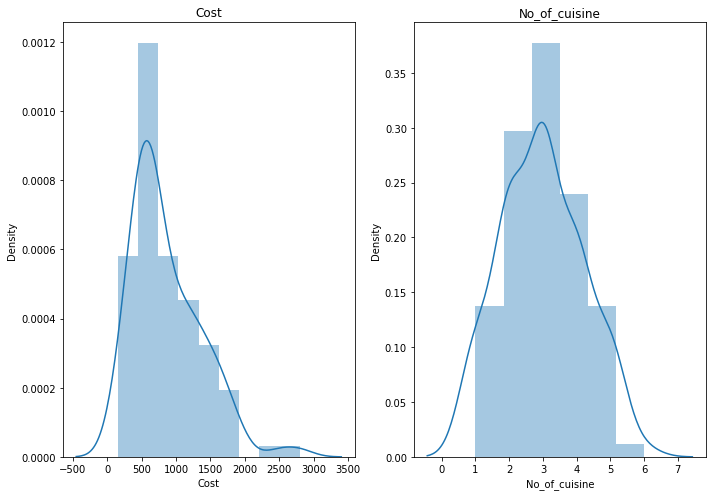

In [ ]:
# See the distribution of numerical features

#Distribution plot for hotel dataset
n=1
plt.figure(figsize=(10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.distplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

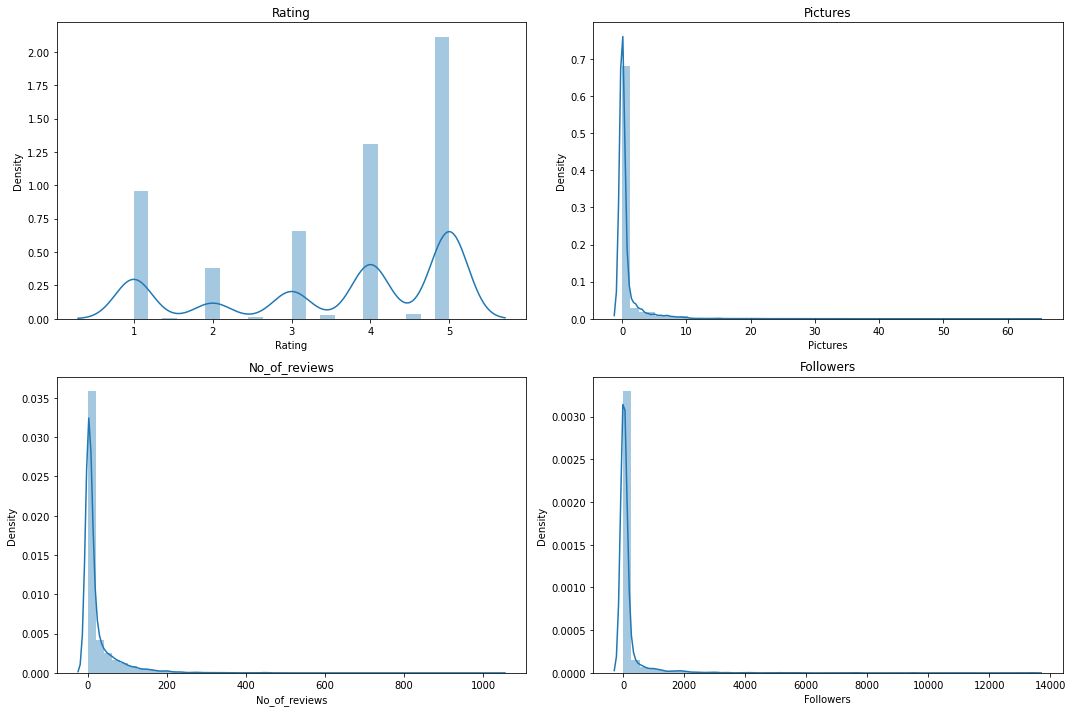

In [ ]:
  #Distribution plot
n=1
plt.figure(figsize=(15,10))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.distplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Hotel Dataset: Cost is right skewed while Number of cuisine is normally distributed.

----
Review dataset : Pictures, No_of_reviews and followers are right skewed.


#### Chart - 10

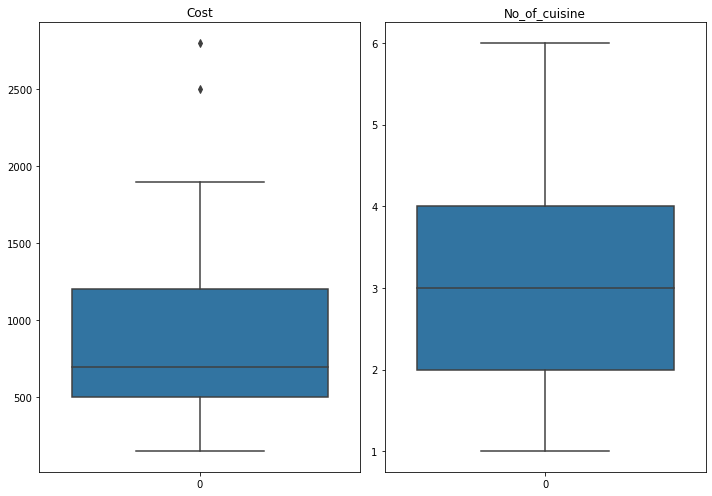

In [ ]:
# boxplot plot for hotel dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.boxplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

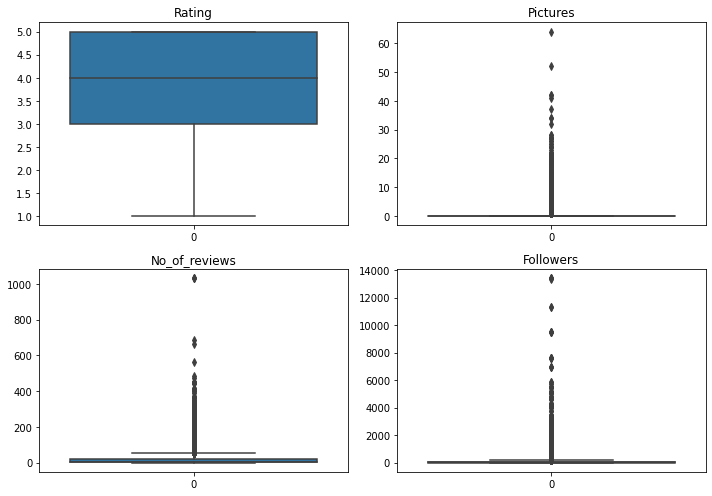

In [ ]:
#Box plot for review dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To check for outliers, I have used Boxplot.

##### 2. What is/are the insight(s) found from the chart?

Hotel Dataset : Not much of the outliers is seen in Cost and Number of cuisines.

----
Review Dataset : Pictures, No_of_reviews and Followers seems to have outliers. 

#### Chart - 11

In [ ]:
#Get the count of hour in which customers have given review
hr_count=pd.DataFrame(review.groupby(by='Hour',as_index=False)['Hour'].count().reset_index(drop=False))
hr_count.rename(columns={'index':'Hour','Hour':'Count'},inplace=True)
hr_count

Hour  Count
0      0    509
1      1    313
2      2    167
3      3    102
4      4     55
5      5     39
6      6     44
7      7     78
8      8    134
9      9    171
10    10    229
11    11    308
12    12    460
13    13    580
14    14    776
15    15    645
16    16    549
17    17    480
18    18    438
19    19    522
20    20    714
21    21    877
22    22    968
23    23    804

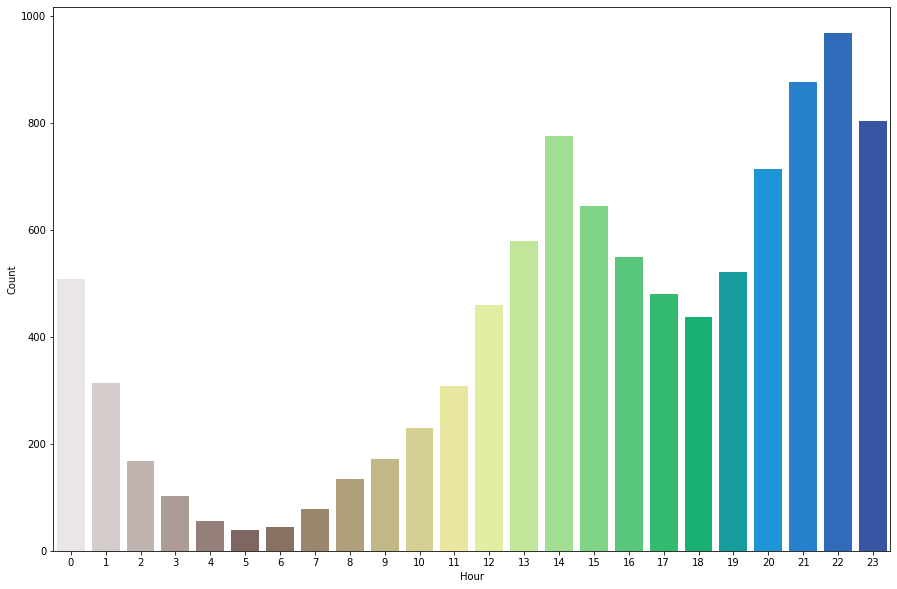

In [ ]:
#visualizing through bar plot
plt.figure(figsize=(15,10))
a=sns.barplot(x='Hour',y='Count',data=hr_count,palette='terrain_r')
a.set_xticks(range(len(hr_count)))

In [ ]:
# Get the count of years in Zomato data
year_count=pd.DataFrame(review['Year'].value_counts().sort_values(ascending=False).reset_index())
year_count.rename(columns={'index':'Year','Year':'Count'},inplace=True)
year_count

Year  Count
0  2018   4903
1  2019   4803
2  2017    213
3  2016     43

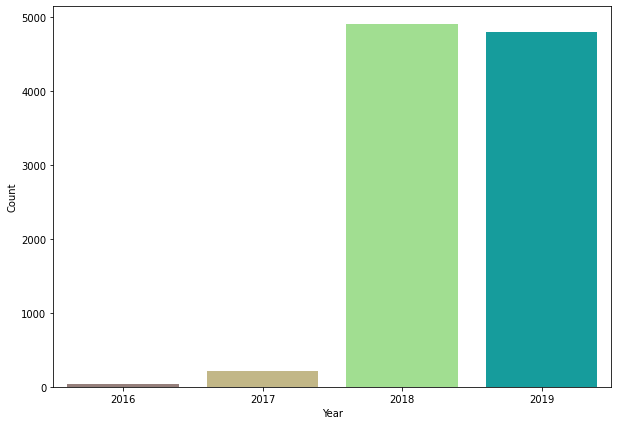

In [ ]:
#visualizing through line plot
plt.figure(figsize=(10,7))
a=sns.barplot(x='Year',y='Count',data=year_count,palette='terrain_r')
a.set_xticks(range(len(year_count)))

##### 1. Why did you pick the specific chart?

To see the count of review for restauants given in each year and each hour.

##### 2. What is/are the insight(s) found from the chart?

Hour : The frequency is higher during the night time from hour 19 to 22, i.e., from 7:00 pm to 11:00 pm. Possibly because people mostly  order food during these hours.

----
Year : The frequency is minimum in the year 2016 while its maximum in the year 2019. It is possible due to the fact that there is improvement in technology and people getting familiar with new applications and online system.

#### Chart - 12

In [ ]:
# No of reviews given to the restaurants
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

index                               Restaurant  No_of_reviews
0    7297                                  Labonel           1031
1    9208     Collage - Hyatt Hyderabad Gachibowli           1031
2    3124                              Pista House           1031
3    4512                              Owm Nom Nom            685
4    7638            The Old Madras Baking Company            665
5    6627                             Aromas@11SIX            560
6    9653                        Hyderabadi Daawat            482
7    9999                         Chinese Pavilion            472
8    9168  Cascade - Radisson Hyderabad Hitec City            452
9    5889                                 Tempteys            452
10   7686            The Old Madras Baking Company            452
11    755                 Shah Ghouse Spl Shawarma            443
12   5988                                KS Bakers            443
13   3189                              Pista House            443
14   5352                          Diners Pavilion            443
15   8487                                  T Grill            443
16   8519                            Momos Delight            443
17   9179  Cascade - Radisson Hyderabad Hitec City            417
18   9181  Cascade - Radisson Hyderabad Hitec City            414
19   4233                             Karachi Cafe            411

[Text(0, 0, '1031'),
 Text(0, 0, '1031'),
 Text(0, 0, '737'),
 Text(0, 0, '685'),
 Text(0, 0, '558.5'),
 Text(0, 0, '560'),
 Text(0, 0, '482'),
 Text(0, 0, '472'),
 Text(0, 0, '427.667'),
 Text(0, 0, '452'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '411')]

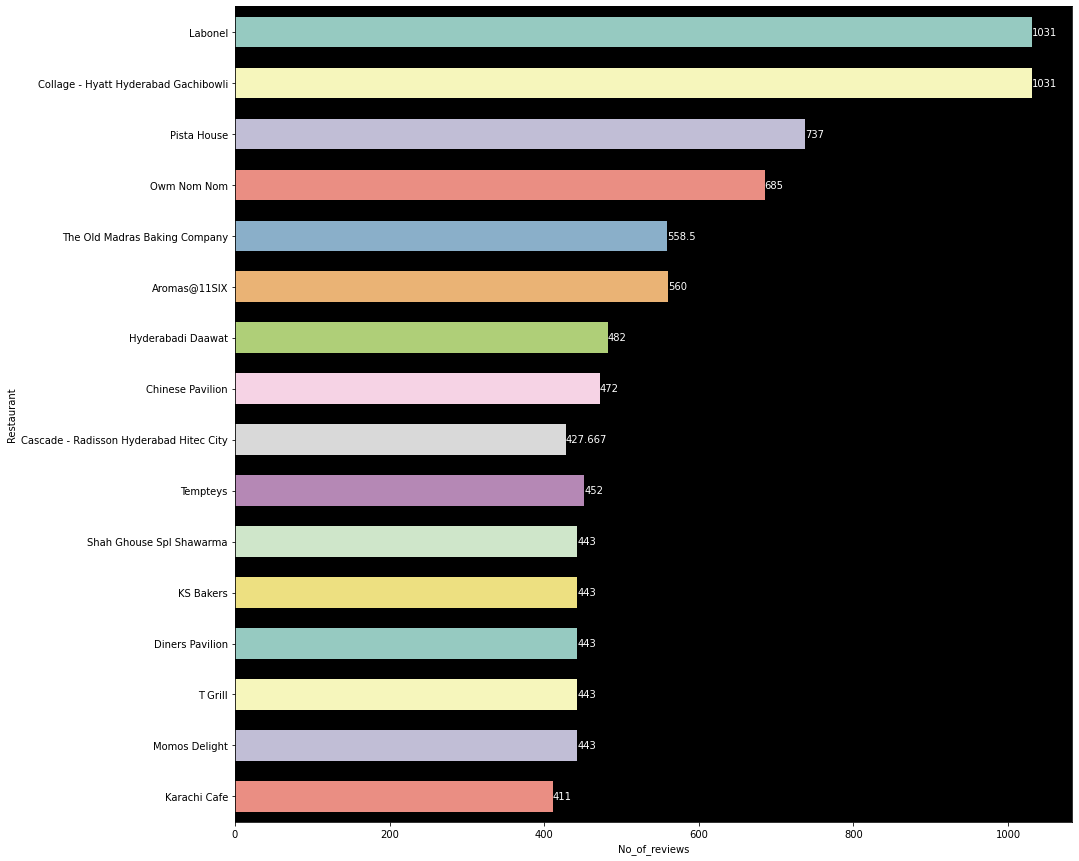

In [ ]:
# Chart - 11 visualization code
# No of reviews for each restaurant
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review ,palette = 'Set3',errwidth = 0, width = 0.6)
ax.set_facecolor("black")
ax.bar_label(ax.containers[0], color = 'White')

##### 1. Why did you pick the specific chart?

To check which restaurants are given most number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Here Labonel and Collage - Hyatt Hyderabad Gachibowli (which is also the most expensive) are given he maximun number of reviews with the count of 1031 (which is really a good figure).	

#### Chart - 13

In [ ]:
# TOTAL PICTURES POSTED FOR THE PARTICULAR RESTAURANT
pic_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).reset_index(drop=True))

# Top 10 restaurants with highest number of pictures posted
pic_count_top10=pic_count.head(10)
pic_count_top10

Restaurant  Pictures
0                                         PourHouse7       356
1                                       Arena Eleven       280
2                               Marsala Food Company       276
3                                  Hyderabadi Daawat       234
4                                American Wild Wings       218
5                                        Driven Cafe       212
6                                   Chinese Pavilion       201
7                         Urban Asia - Kitchen & Bar       178
8               Collage - Hyatt Hyderabad Gachibowli       173
9  Jonathan's Kitchen - Holiday Inn Express & Suites       163

In [ ]:
# Last five restaurants with lowest number of pictures posted
pic_count_bottom10=pic_count.tail(10)
pic_count_bottom10

Restaurant  Pictures
90                           Aromas@11SIX         5
91                       Hotel Zara Hi-Fi         5
92                               Delhi-39         4
93                    Mohammedia Shawarma         4
94                         Domino's Pizza         4
95                           Being Hungry         3
96                        Hyderabad Chefs         2
97                               Paradise         2
98  Shree Santosh Dhaba Family Restaurant         2
99              Hitech Bawarchi Food Zone         1

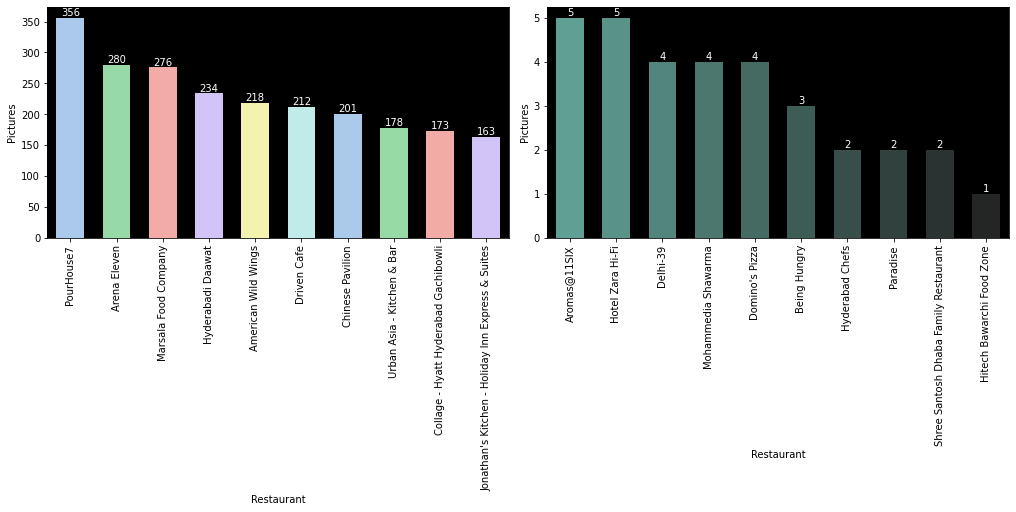

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of pictures posted
a = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_top10 ,palette = "pastel6",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_xticklabels(labels=pic_count_top10['Restaurant'].to_list(),rotation=90)
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of pictures posted
b = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_bottom10 ,palette = 'dark:#5A9_r',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_xticklabels(labels=pic_count_bottom10['Restaurant'].to_list(),rotation=90)
b.set_facecolor("black")

##### 1. Why did you pick the specific chart?

To see most and least number of picture posted for the restaurant.

##### 2. What is/are the insight(s) found from the chart?

Here PourHouse7	has the maximum number of picture posted by the reviewers which is 356 followed by Arena Eleven.

#### Chart - 14

In [ ]:
# TOTAL Followers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))

# Restaurants with highest number opf followers
follower_count_top10=follower_count.head(10)
follower_count_top10

Restaurant  Followers
0                              Pista House    51068.0
1  Komatose - Holiday Inn Express & Suites    46229.0
2                        Hyderabadi Daawat    45375.0
3                    The Tilt Bar Republic    42126.0
4                           Dunkin' Donuts    37667.0
5                         Chinese Pavilion    35426.0
6                                   Faasos    34640.0
7                                  T Grill    32222.0
8  Cascade - Radisson Hyderabad Hitec City    31644.0
9                          Barbeque Nation    30866.0

In [ ]:
# Restaurants with lowest number opf followers
follower_count_bottom10=follower_count.tail(10)
follower_count_bottom10

Restaurant  Followers
90                               Flechazo     2748.0
91                    Kritunga Restaurant     2223.0
92                       Hotel Zara Hi-Fi     1818.0
93         3B's - Buddies, Bar & Barbecue     1676.0
94                 Royal Spicy Restaurant     1497.0
95                               Delhi-39     1222.0
96              AB's - Absolute Barbecues     1060.0
97                               Paradise      798.0
98                    Mohammedia Shawarma      791.0
99  Shree Santosh Dhaba Family Restaurant      562.0

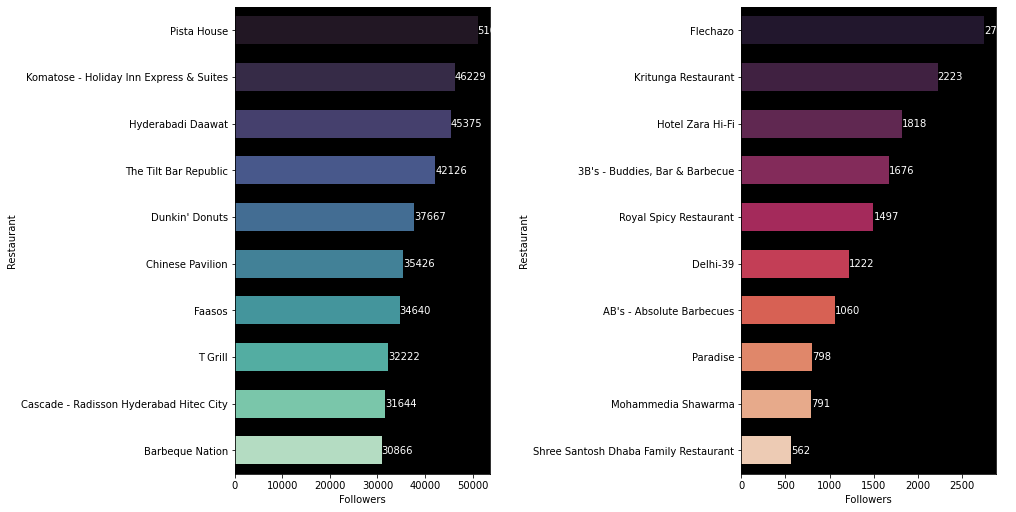

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_count_top10['Restaurant'].to_list())
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_count_bottom10['Restaurant'].to_list())
b.set_facecolor("black")

##### 1. Why did you pick the specific chart?

To see the least and most follower of reviewer of the restaurants.

##### 2. What is/are the insight(s) found from the chart?

Here  Reviewer of restaurant "Pista House" has the most number of followers, while Reviewers of restaurant "Shree Santosh Dhaba Family Restaurant" has the least number of followers .

#### Chart - 15 - Correlation Heatmap

<Axes: >

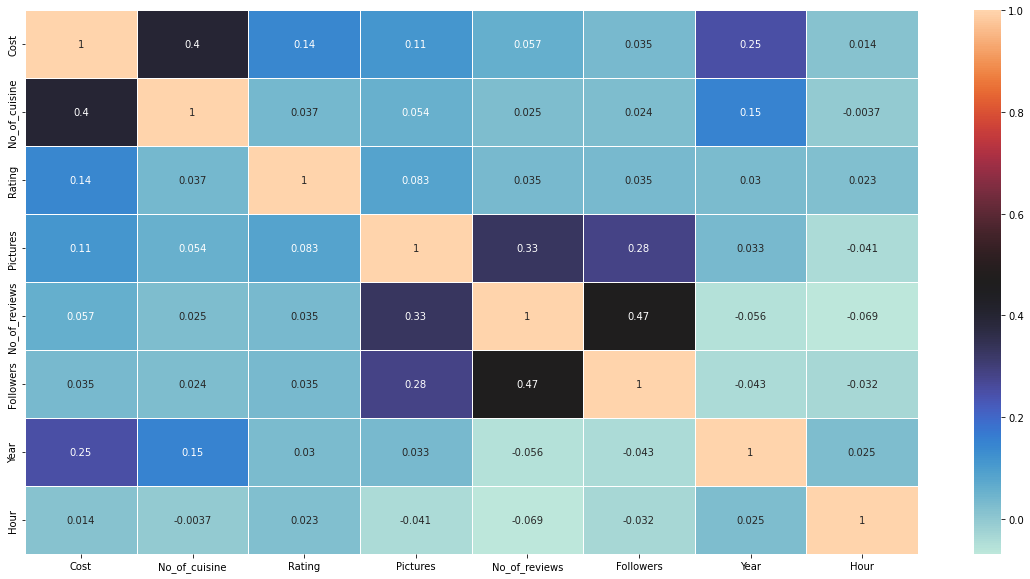

In [ ]:
# Correlation Heatmap visualization code

# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

##### 1. Why did you pick the specific chart?

To see the correlation among numerical features.

##### 2. What is/are the insight(s) found from the chart?

Inference:

* Number of reviews and followes has correlation of 0.47 which can be considered as moderate.
* Similarly cost and number f cuisines has moderate correlation of 0.4
* There is low correlation between:
  * Pictures and Followers
  * Pictures and No of reviews
  * Cost and year

   Since these correlations are low, No case of multicollinearity arises.
* Other features have very low correlation.


#### Chart - 16 - Pair Plot 

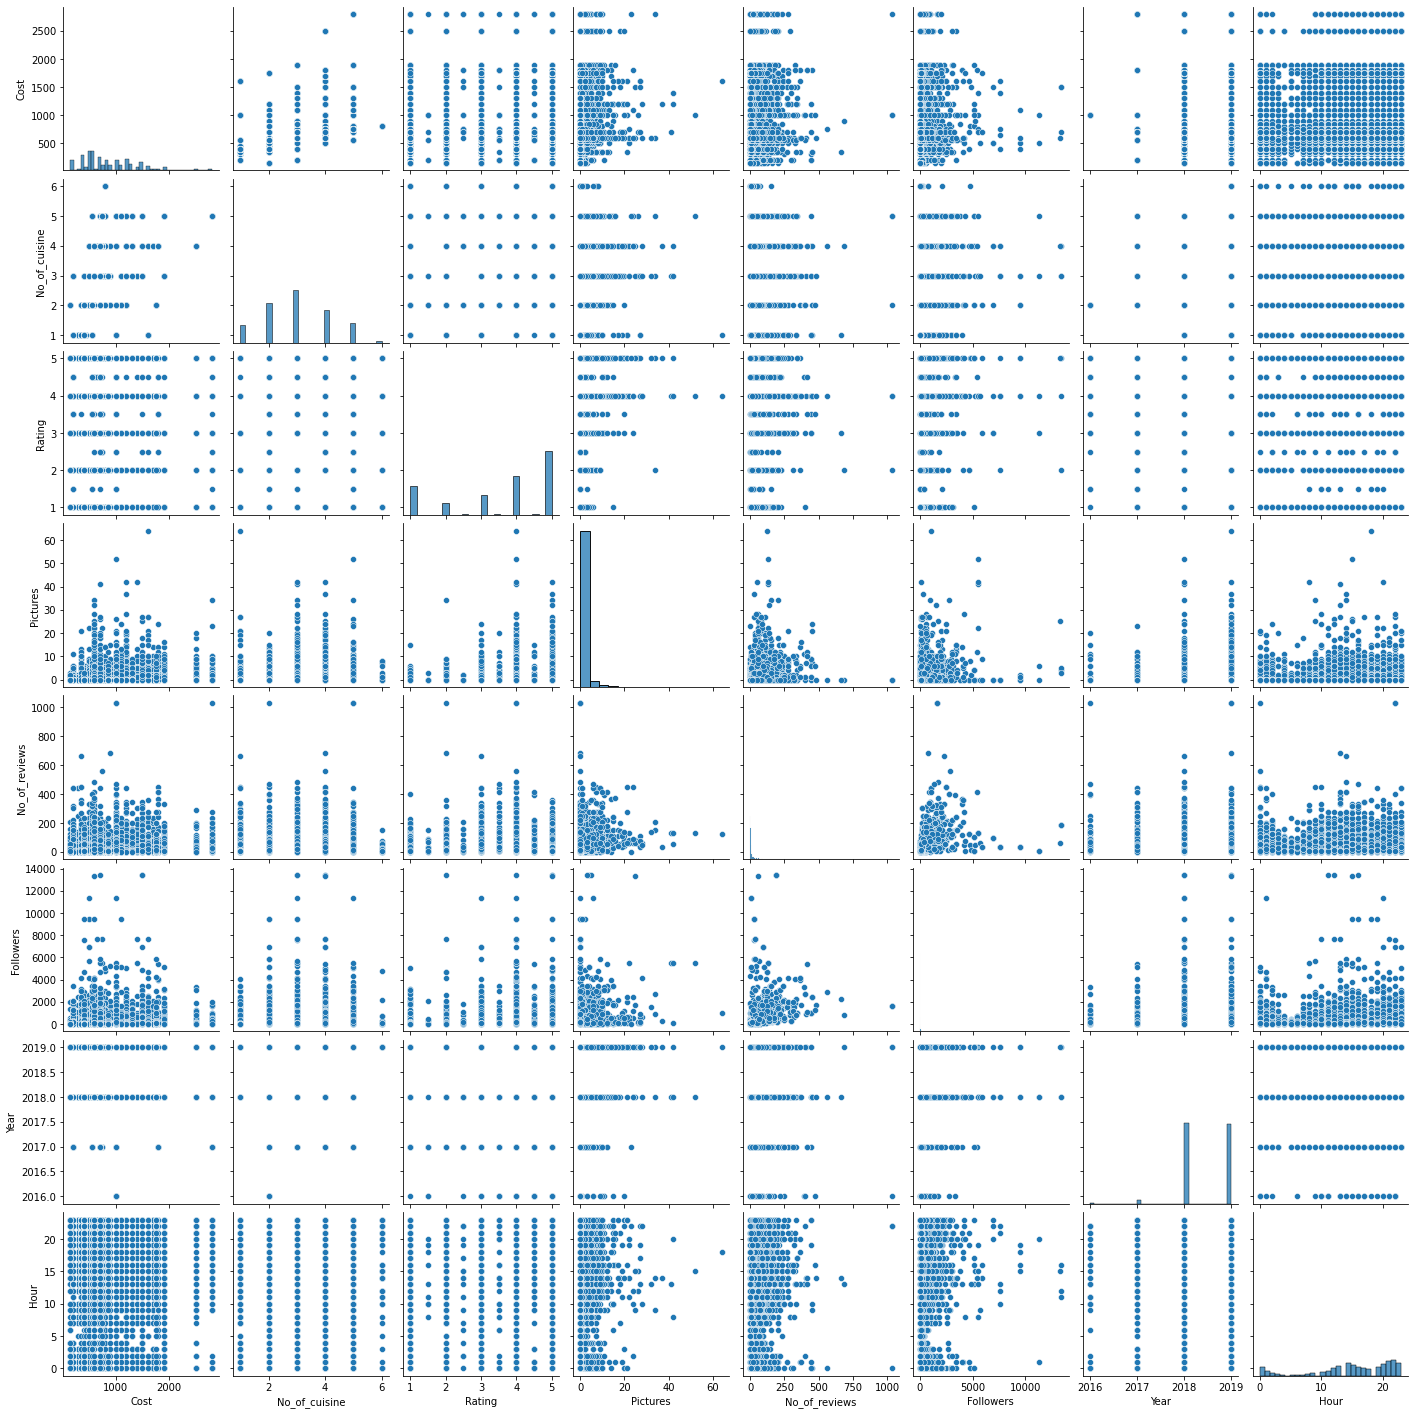

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

## Hotel dataset

In [ ]:
#Function to see the percent of missing value
def null_value_per(df):
  
  null_df=pd.DataFrame()
  null_count=df.isnull().sum()
  null_per = null_count/df.shape[0]*100
  null_df['Null_Count']=null_count
  null_df['Null_percent']=null_per

  return null_df

In [ ]:
# Handling Missing Values & Missing Value Imputation

hotel_null_values = null_value_per(hotel)
hotel_null_values

Null_Count  Null_percent
Restaurant              0      0.000000
Links                   0      0.000000
Cost                    0      0.000000
Collections            54     51.428571
Cuisines                0      0.000000
Timings                 1      0.952381
No_of_cuisine           0      0.000000

* Timings contain 1 null value, so it can be imputed with mode of the column.
* Collections contain more than 50% null values. Hence it must be dropped.
* Also links is not useful for data analysis. Hence we will drop it.

Let's check for one missing value in Timings...

In [ ]:
# checking for one missing value in Timings
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  No_of_cuisine  
30         NaN  Andhra, South Indian, North Indian     NaN              3

In [ ]:
# Imputing timings missing value with mode of that column
from pandas._libs.hashtable import mode
hotel['Timings'].fillna(hotel.Timings.mode()[0],inplace = True)

In [ ]:
# Dropping the columns collection and Links
hotel.drop(columns = ['Collections'],axis = 1,inplace = True)

## Review dataset

In [ ]:
# mISSING values in review dataset
review_null_values = null_value_per(review)
review_null_values

Null_Count  Null_percent
Restaurant              0      0.000000
Reviewer                0      0.000000
Review                  7      0.070267
Rating                  0      0.000000
Metadata                0      0.000000
Time                    0      0.000000
Pictures                0      0.000000
No_of_reviews           0      0.000000
Followers               0      0.000000
Year                    0      0.000000
Hour                    0      0.000000

In [ ]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review"})

In [ ]:
# Dropping the collmn metadata
#review.drop(columns = ['Metadata'],axis=1,inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

For Hotel dataset:
* Imputed the one null value in Timings with mode of column because it is assumed that opening and closing time is similar for most of the restaurants.
* Since Collections contain more than 50% null values, hence this column has been dropped.

For review dataset:
* There are missing values in review, Hence filled it with 'No review'.

### 2. Handling Outliers

### Anamoly Detection

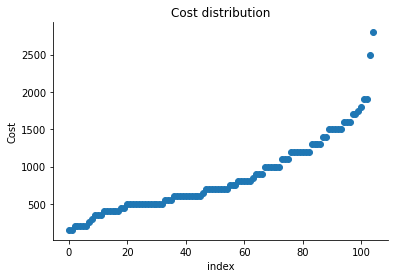

In [ ]:
# plotting graph for cost
plt.scatter(range(hotel.shape[0]), np.sort(hotel['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

In [ ]:
print(review.columns)
print(hotel.columns)

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'No_of_reviews', 'Followers', 'Year', 'Hour'],
      dtype='object')
Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'No_of_cuisine'], dtype='object')


In [ ]:
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])   

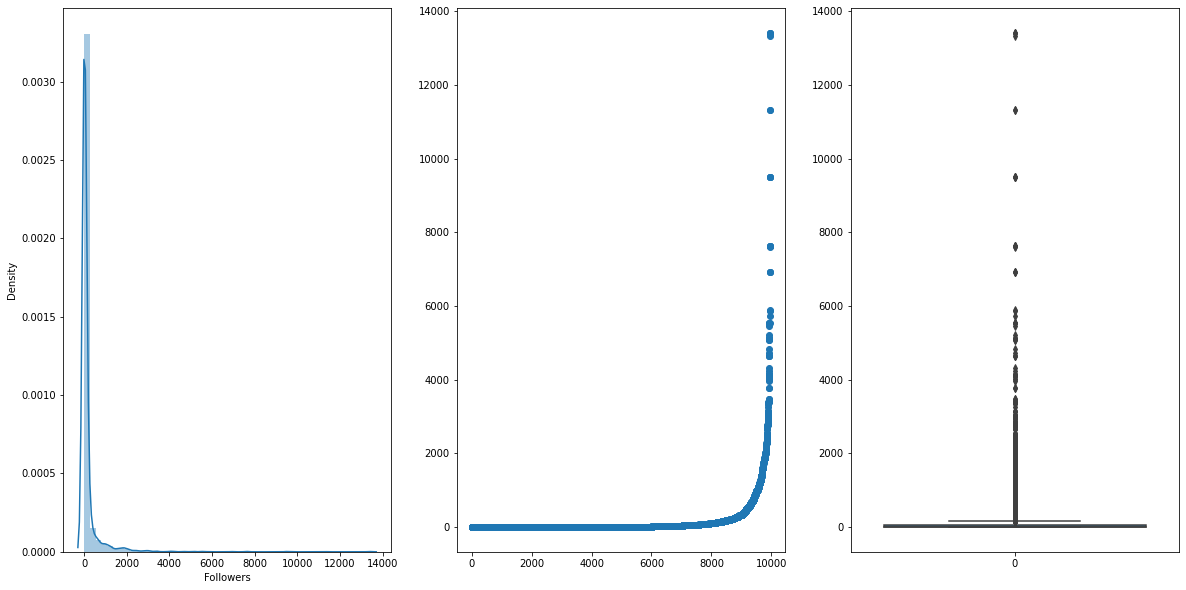

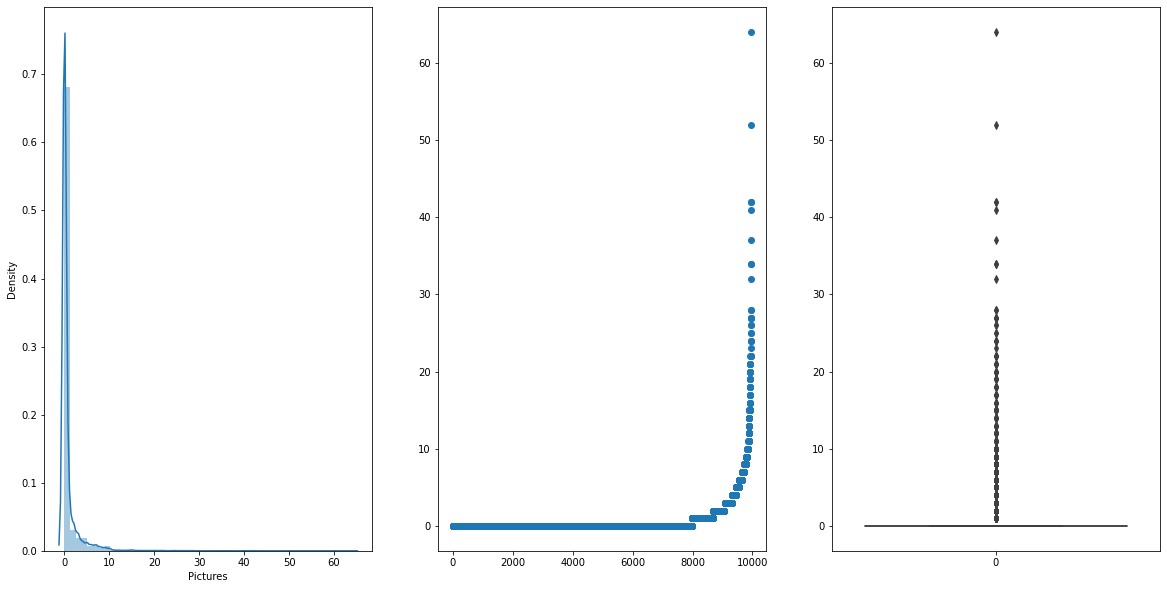

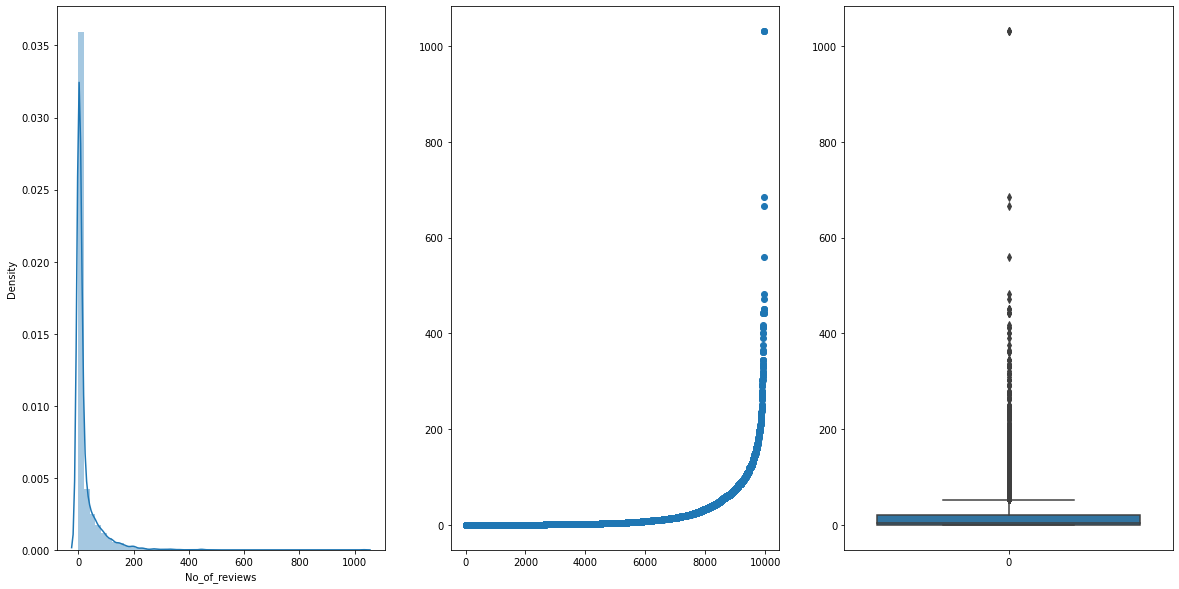

In [ ]:
# Getting outliers for review dataset
outlier_plots(review,['Followers','Pictures','No_of_reviews'])

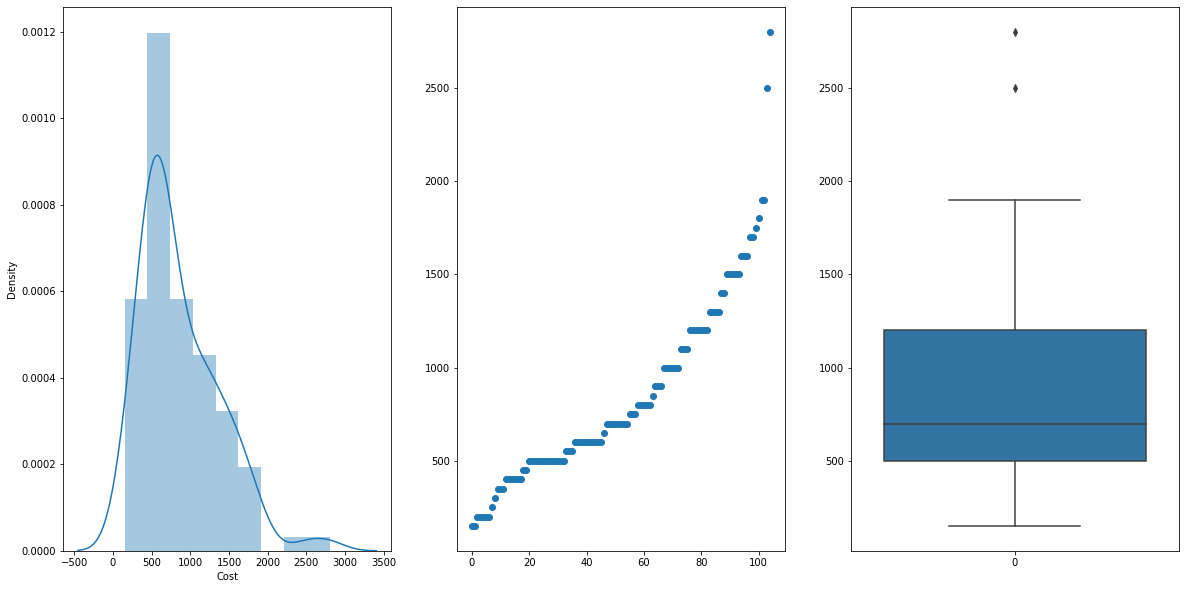

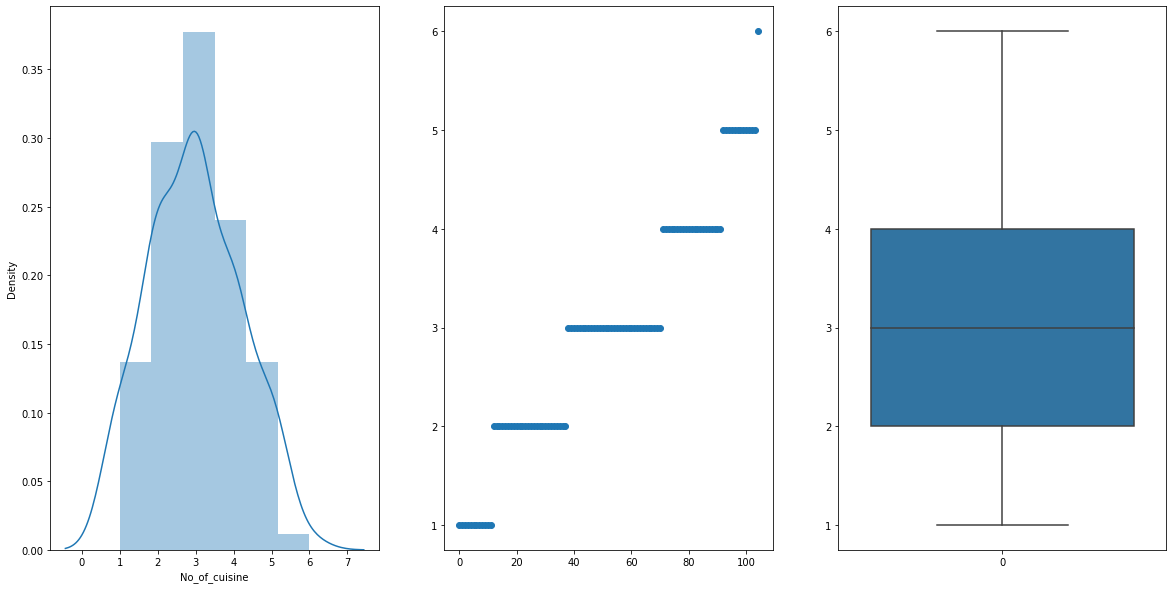

In [ ]:
# getting outliers for hotel dataset
outlier_plots(hotel,['Cost','No_of_cuisine'])

In [ ]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(hotel['Cost'].values.reshape(-1, 1))
#hotel['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(hotel['Cost'].values.reshape(-1, 1))
#hotel['outlier_univariate_Cost'] = isolation_forest.predict(hotel['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [ ]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

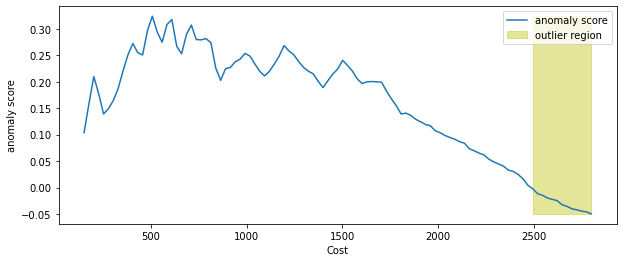

In [ ]:
#visualizing outlier for cost
visualize_outliers(hotel,'Cost')

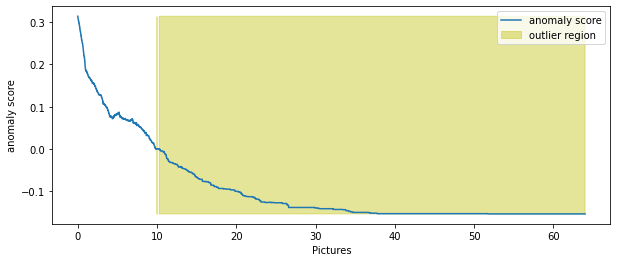

In [ ]:
#visualizing outlier for pictures
visualize_outliers(review,'Pictures')

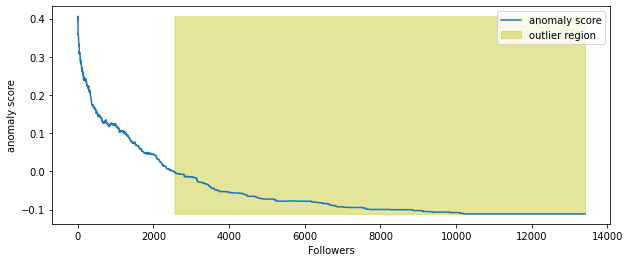

In [ ]:
#visualizing outlier for Followers
visualize_outliers(review,'Followers')

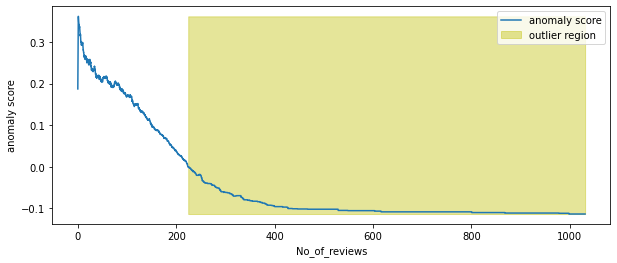

In [ ]:
#visualizing outlier for No_of_reviews
visualize_outliers(review,'No_of_reviews')

In [ ]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bound =df[feature].quantile(0.25)- 1.5*IQR
  upper_bound =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound 

In [ ]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [ ]:
replace_outliers(hotel,'Cost')
replace_outliers(review,'Pictures')
replace_outliers(review,'No_of_reviews')
replace_outliers(review,'Followers')


KeyError: ignored

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***